# Case analítico: Desafio de ciência de dados Lighthouse/Indicium  

# Considerações iniciais do projeto:

#### Objetivo:

Este relatório faz parte de um case analítico proposto como projeto teste para vaga de estágio na INDICIUM para a área de ciência de dados e tem como objetivo analisar um banco de dados cinematográfico(IMDB) para encontrar uma forma de orientar qual o tipo de filme que deve ser o próximo a entrar em fase de desenvolvimento.

#### Dicionário dos dados:

aqui estão as colunas que iremos trabalhar neste projeto e o significado de cada uma das variáveis nelas contidas.

| Coluna         | Descrição                                   |
|----------------|--------------------------------------------|
| Genre          | Gênero do filme                             |
| IMDB_Rating    | Nota do IMDB                                |
| Overview       | Overview do filme                           |
| Meta_score     | Média ponderada de todas as críticas       |
| Director       | Diretor do filme                            |
| Star1          | Ator/atriz principal #1                     |
| Star2          | Ator/atriz principal #2                     |
| Star3          | Ator/atriz principal #3                     |
| Star4          | Ator/atriz principal #4                     |
| No_of_Votes    | Número de votos                             |
| Gross          | Faturamento do filme                        |


## 1.0 Carregando bibliotecas que serão utilizadas na primeira parte do projeto(EDA):

In [170]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
# Estatística
from scipy import stats
from scipy.stats import spearmanr
import statsmodels.api as sm

# NLP / texto
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Utilidades
from collections import Counter
import os

# descomentar caso nao tenha os recursos baixados.
#nltk.download('stopwords')
# nltk.download('punkt')

#estilo adotado no seaborn para cores e estilização dos gráficos
sns.set(style="white")

#### 1.1 configurando o caminho do csv

In [12]:
#caminho para a pasta
path = "C:/Users/orfeu/Desktop/LH_DC_Project/data"

In [13]:
#leitura do dataset que será utilizado
df = pd.read_csv(os.path.join(path, 'desafio_indicium_imdb.csv'))

## 2.0 Exploração inicial dos dados:

#### 2.1 três primeiras linhas da tabela:

In [16]:
display(df.head(3))

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


#### 2.2 informações gerais da tabela

In [18]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


None

#### 2.3 descrição dos dados:

In [20]:
display(df.describe())

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


#### 2.4 contagem de dados nulos na tabela:

In [27]:
display(df.isnull().sum())

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

#### 2.5 quantos filmes estão duplicados na tabela:

In [31]:
duplicados = df.duplicated(subset=["Series_Title"]).sum()
print(f"Filmes duplicados encontrados: {duplicados}")

Filmes duplicados encontrados: 1


In [33]:
display(df.sort_values('Gross', ascending=False).head(10)[['Series_Title','Gross','IMDB_Rating','No_of_Votes']])


,Series_Title,Gross,IMDB_Rating,No_of_Votes
737,Rockstar,"985,912",7.7,39501
681,The Color Purple,"98,467,863",7.8,78321
193,Sherlock Jr.,"977,375",8.2,41985
747,The Social Network,"96,962,694",7.7,624982
6,Schindler's List,"96,898,818",8.9,1213505
188,Rashômon,"96,568",8.2,152572
947,The Others,"96,522,687",7.6,337651
988,The Long Goodbye,"959,000",7.6,26337
265,Dead Poets Society,"95,860,116",8.1,425457
476,Star Wars: Episode VII - The Force Awakens,"936,662,225",7.9,860823


## 3.0 Tratamento inicial dos dados:

In [36]:
df = df.drop(columns=["Unnamed: 0"])

#### 3.1 Transformando o ano para número inteiro:

In [39]:
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")

#### 3.2 pegar apenas o runtime(tempo de duração) dofilme:

In [42]:
df["Runtime_min"] = df["Runtime"].str.replace(" min", "").astype(float)

#### 3.3 convertendo a coluna de faturamento(gross) para numérica(remoção das vírgulas)

In [45]:
df["Gross"] = df["Gross"].str.replace(",", "")
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

#### 3.4 quebrando os generos de cada filme(as vezes um filme pode ter mais de um genero)

In [48]:
genres = df["Genre"].dropna().str.split(", ")
todos_generos = [g for lista in genres for g in lista]
contagem_generos = Counter(todos_generos)

#### 3.5 Criando uma coluna com a década em que o filme foi lançado:

In [51]:
# Aqui eu achei necessário pois pretendo trazer informações
# inseridas na década que o filme foi lançado
df["Decada"] = (df["Released_Year"] // 10) * 10

#### 3.6 tratando dados duplicados:

In [54]:
if duplicados > 0:
    df = df.drop_duplicates(subset=["Series_Title"], keep="first")
    print("Duplicados removidos.")

nulos = df.isnull().sum().sort_values(ascending=False)
display(nulos)

pct_nulos = (df.isnull().mean()*100).sort_values(ascending=False).round(2)
display(pct_nulos)

Duplicados removidos.


Gross            169
Meta_score       156
Certificate      101
Decada             1
Released_Year      1
Star2              0
Runtime_min        0
No_of_Votes        0
Star4              0
Star3              0
Series_Title       0
Star1              0
Overview           0
IMDB_Rating        0
Genre              0
Runtime            0
Director           0
dtype: int64

Gross            16.93
Meta_score       15.63
Certificate      10.12
Decada            0.10
Released_Year     0.10
Star2             0.00
Runtime_min       0.00
No_of_Votes       0.00
Star4             0.00
Star3             0.00
Series_Title      0.00
Star1             0.00
Overview          0.00
IMDB_Rating       0.00
Genre             0.00
Runtime           0.00
Director          0.00
dtype: float64

#### 3.7 removendo registros críticos(onde não há ano, duração, nota ou votos):

In [57]:
df = df.dropna(subset=["Released_Year","Runtime","IMDB_Rating","No_of_Votes"])
print("Registros sem ano/duração/nota/votos foram removidos.")

Registros sem ano/duração/nota/votos foram removidos.


#### 3.8 checando o df:

In [60]:
linhas, colunas = df.shape
display(f"Linhas: {linhas}")
display(f"Colunas: {colunas}")

'Linhas: 997'

'Colunas: 17'

#### 3.13 limpar valores faltantes e remover espaços de Classificação(certificate):

In [63]:
df['Classificacao'] = df['Certificate'].fillna('Desconhecida').str.strip()

## 4.0 Distribuição das variáveis numéricas:

Aqui torna-se necessário olhar a forma das distribuições das principais variáveis numéricas do conjunto. Isso ajudará a entender se temos dados concentrados, assimétricos, com outliers ou qualquer outro atributo que necessite de atenção.

#### 4.1 Notas do IMDB:

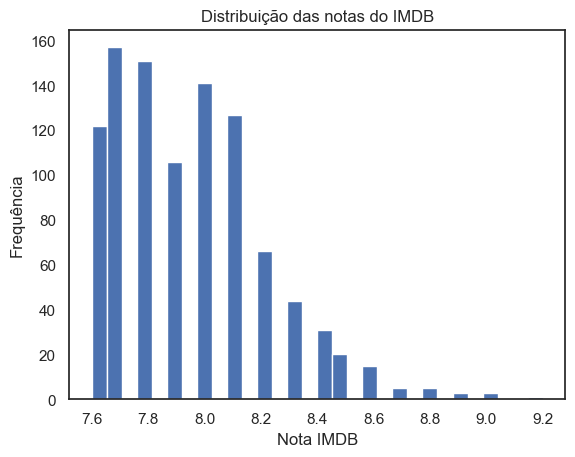

In [68]:
plt.hist(df["IMDB_Rating"].dropna(), bins=30)
plt.title("Distribuição das notas do IMDB")
plt.xlabel("Nota IMDB")
plt.ylabel("Frequência")
plt.show()

#### 4.2 Número de votos:

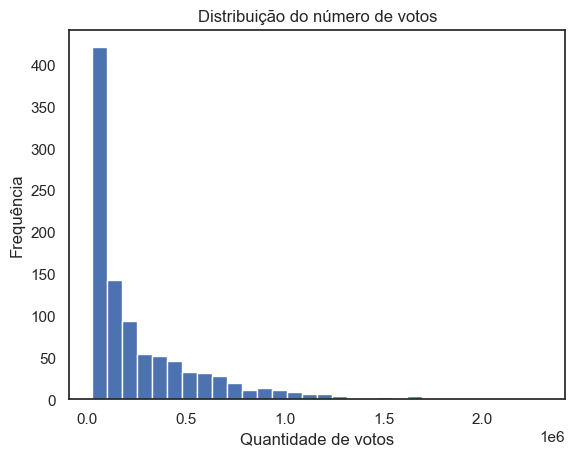

In [71]:
plt.hist(df["No_of_Votes"].dropna(), bins=30)
plt.title("Distribuição do número de votos")
plt.xlabel("Quantidade de votos")
plt.ylabel("Frequência")
plt.show()

#### 4.3 Faturamento(Gross, que foi colocado em log):

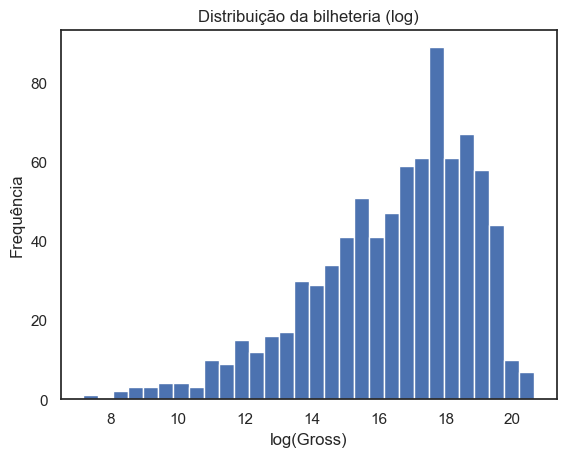

In [74]:
plt.hist(np.log1p(df["Gross"].dropna()), bins=30)
plt.title("Distribuição da bilheteria (log)")
plt.xlabel("log(Gross)")
plt.ylabel("Frequência")
plt.show()

#### 4.4 Tempo de Duração(runtime):

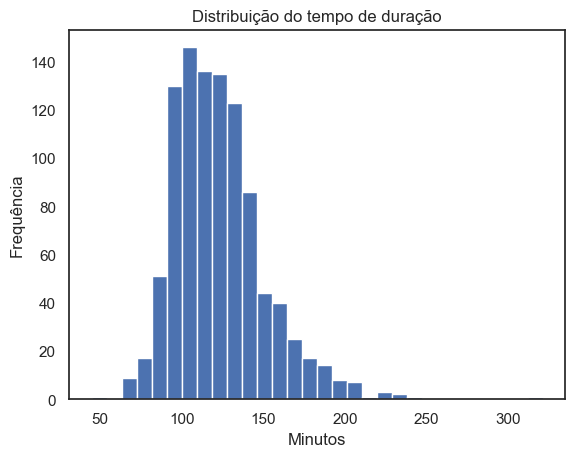

In [77]:
plt.hist(df["Runtime_min"].dropna(), bins=30)
plt.title("Distribuição do tempo de duração")
plt.xlabel("Minutos")
plt.ylabel("Frequência")
plt.show()

#### 4.5 boxplot para análise de outliers

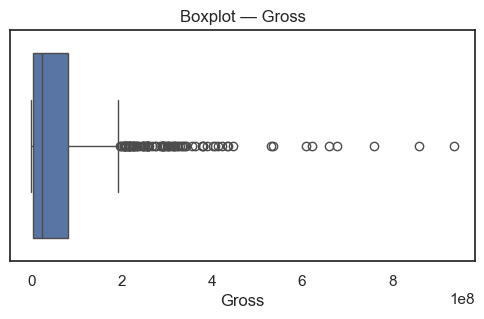

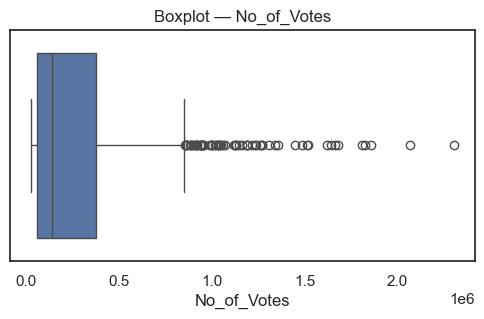

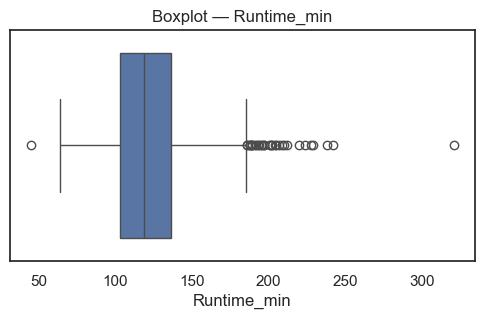

,Gross,No_of_Votes,Runtime_min
q1,3.261780e+06,55362.00,103.00
q3,8.062545e+07,373845.00,136.00
iqr,7.736367e+07,318483.00,33.00
limite_inferior,-1.127837e+08,-422362.50,53.50
limite_superior,1.966709e+08,851569.50,185.50
percentual_outliers,1.075000e+01,6.62,3.41


In [81]:
variaveis_out = ['Gross','No_of_Votes','Runtime_min']

for v in variaveis_out:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[v].dropna())
    plt.title(f'Boxplot — {v}')
    plt.show()

def resumo_outliers(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    limite_inf, limite_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
    return {
        'q1': q1, 'q3': q3, 'iqr': iqr,
        'limite_inferior': limite_inf, 'limite_superior': limite_sup,
        'percentual_outliers': ((s < limite_inf) | (s > limite_sup)).mean()*100
    }

display(pd.DataFrame({v: resumo_outliers(df[v].dropna()) for v in variaveis_out}).round(2))

#### 4.6 Violin plots para complementar os boxplots


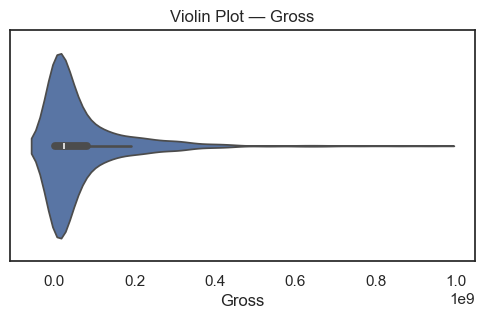

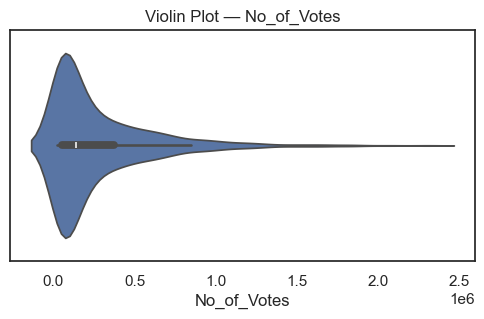

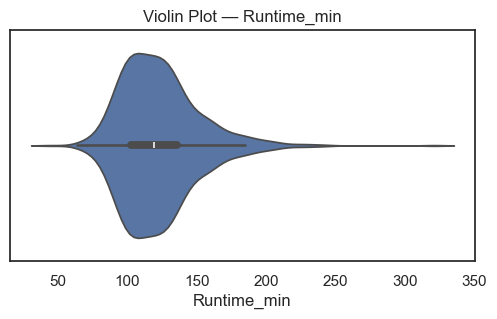

In [84]:
for v in variaveis_out:
    plt.figure(figsize=(6,3))
    sns.violinplot(x=df[v].dropna(), inner="box")
    plt.title(f'Violin Plot — {v}')
    plt.show()

## 5.0 Correlação entre as variáveis

#### 5.1 requisitos iniciais:

In [91]:
# seleciona apenas as variáveis numéricas
colunas_numericas = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 
                     'Gross', 'Runtime_min', 'Released_Year']

In [93]:
# matriz de correlação de spearman
matriz_spearman = df[colunas_numericas].corr(method='spearman')

#### 5.2 Heatmap da matriz de correlação:

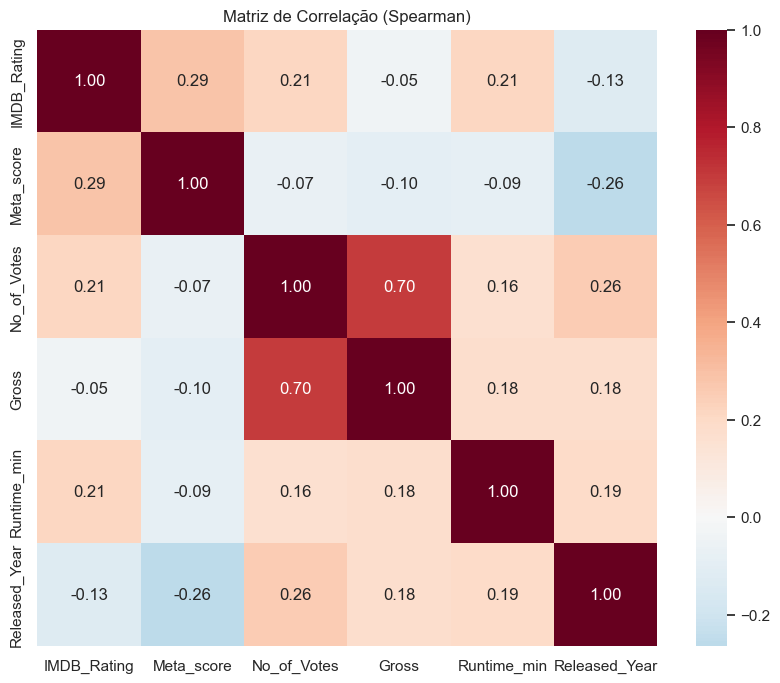

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_spearman, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Matriz de Correlação (Spearman)')
plt.show()

#### 5.3 Correlações mais fortes com IMDB_Rating:

In [98]:
correlacoes_imdb = matriz_spearman['IMDB_Rating'].sort_values(ascending=False)
print("Correlação de Spearman com IMDB_Rating:")
display(correlacoes_imdb)

Correlação de Spearman com IMDB_Rating:


IMDB_Rating      1.000000
Meta_score       0.285117
No_of_Votes      0.213710
Runtime_min      0.210497
Gross           -0.046124
Released_Year   -0.129045
Name: IMDB_Rating, dtype: float64

#### 5.3 IMDB_Rating vs Meta_score

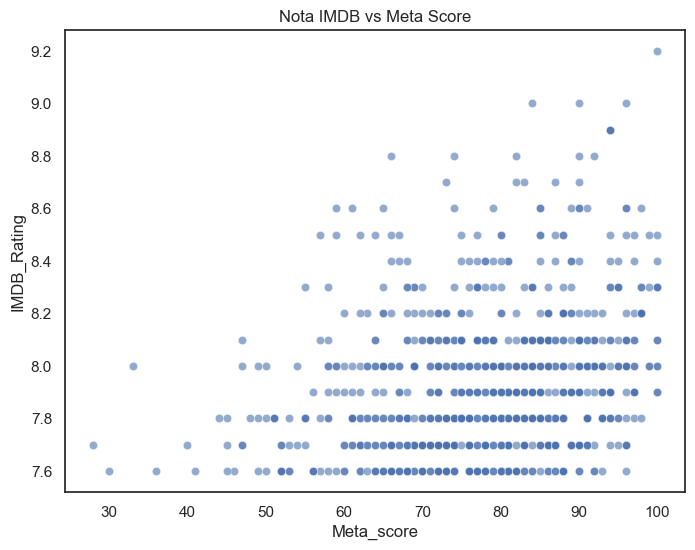

In [100]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Meta_score', y='IMDB_Rating', alpha=0.6)
plt.title('Nota IMDB vs Meta Score')
plt.show()

#### 5.4 IMDB_Rating vs No_of_Votes

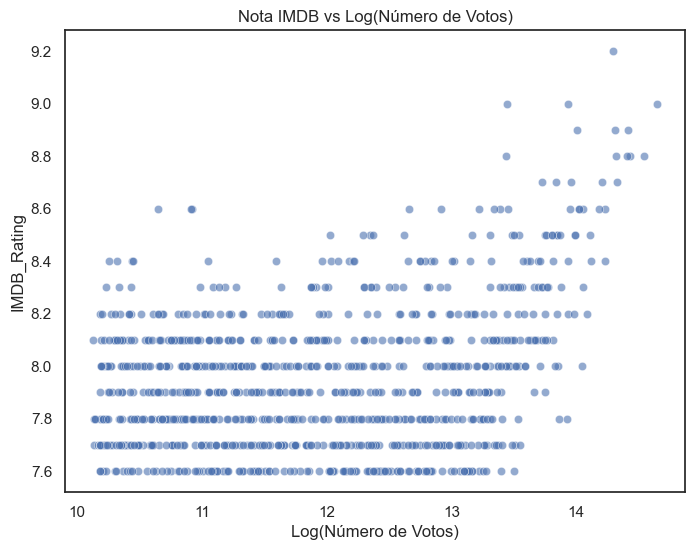

In [104]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, 
                x=np.log1p(df['No_of_Votes']), 
                y='IMDB_Rating', alpha=0.6)
plt.title('Nota IMDB vs Log(Número de Votos)')
plt.xlabel('Log(Número de Votos)')
plt.show()

#### 5.5 Gross vs No_of_Votes


Correlação de Spearman com Gross (Faturamento):
Gross            1.000000
No_of_Votes      0.700027
Runtime_min      0.179777
Released_Year    0.177717
IMDB_Rating     -0.046124
Meta_score      -0.100224
Name: Gross, dtype: float64


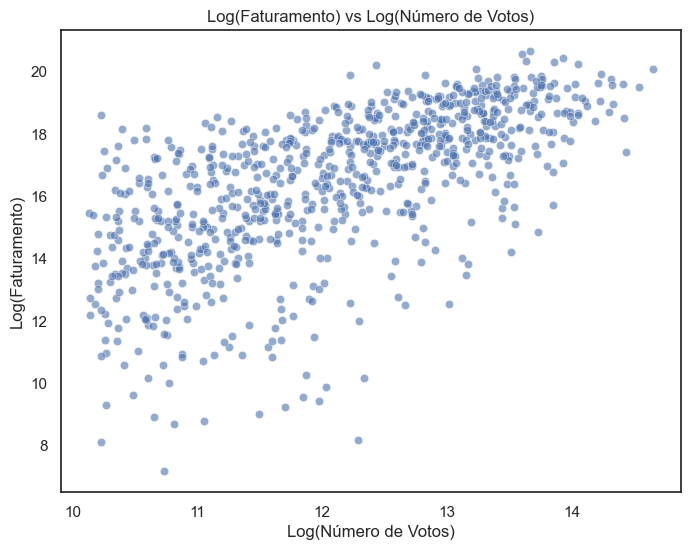

In [106]:
correlacoes_faturamento = matriz_spearman['Gross'].sort_values(ascending=False)
print("\nCorrelação de Spearman com Gross (Faturamento):")
print(correlacoes_faturamento)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, 
                x=np.log1p(df['No_of_Votes']), 
                y=np.log1p(df['Gross']), 
                alpha=0.6)
plt.title('Log(Faturamento) vs Log(Número de Votos)')
plt.xlabel('Log(Número de Votos)')
plt.ylabel('Log(Faturamento)')
plt.show()

#### 5.6 Análise multivariada: Nota IMDB vs. Faturamento vs. Década

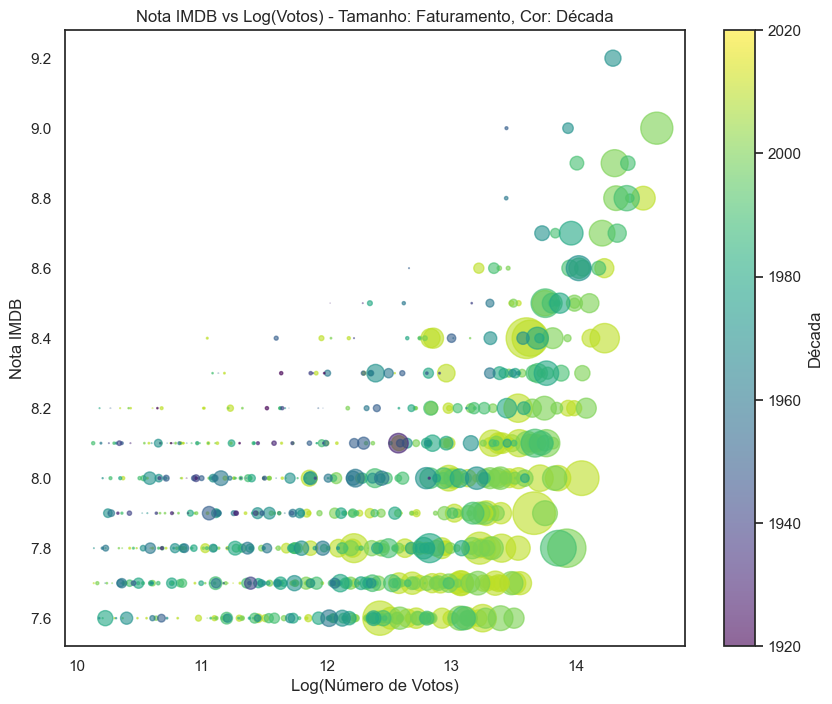

In [109]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=np.log1p(df['No_of_Votes']),
    y=df['IMDB_Rating'],
    c=df['Decada'],
    cmap='viridis',
    alpha=0.6,
    s=df['Gross'].fillna(0)/1e6  # tamanho proporcional ao faturamento
)
plt.colorbar(scatter, label='Década')
plt.title('Nota IMDB vs Log(Votos) - Tamanho: Faturamento, Cor: Década')
plt.xlabel('Log(Número de Votos)')
plt.ylabel('Nota IMDB')
plt.show()

#### 5.7 teste ANOVA para análise de variância:

In [111]:
generos = df.dropna(subset=["Genre"]).copy()
generos["Genero_lista"] = generos["Genre"].str.split(", ")
generos_explod = generos.explode("Genero_lista")


In [113]:
from scipy.stats import f_oneway

# Selecionar os 10 gêneros mais frequentes para ANOVA
top_generos = generos_explod['Genero_lista'].value_counts().head(10).index.tolist()
df_top_generos = generos_explod[generos_explod['Genero_lista'].isin(top_generos)]

# Preparar dados para ANOVA
grupos = [df_top_generos[df_top_generos['Genero_lista'] == genero]['IMDB_Rating'] 
          for genero in top_generos]

# Executar ANOVA
estatistica_f, valor_p = f_oneway(*grupos)

print(f"ANOVA - Gênero vs Nota IMDB:")
print(f"Estatística F: {estatistica_f:.3f}")
print(f"Valor-p: {valor_p:.4f}")

if valor_p < 0.05:
    display("existem diferenças significativas nas notas entre gêneros")
else:
    display("Não existem diferenças significativas nas notas entre gêneros")

ANOVA - Gênero vs Nota IMDB:
Estatística F: 1.248
Valor-p: 0.2612


'Não existem diferenças significativas nas notas entre gêneros'

##### 5.8 Correlação de Spearman (para relações não-lineares)

In [116]:
variaveis_spearman = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime_min']

resultados = []
for i, var1 in enumerate(variaveis_spearman):
    for j, var2 in enumerate(variaveis_spearman):
        if i < j:
            df_temp = df[[var1, var2]].dropna()
            if len(df_temp) > 10:
                correlacao, valor_p = spearmanr(df_temp[var1], df_temp[var2])
                significancia = "✓" if valor_p < 0.05 else "✗"
                resultados.append([var1, var2, correlacao, valor_p, significancia])

# Exibir como DataFrame organizado
df_spearman = pd.DataFrame(resultados, columns=["Var1", "Var2", "Correlação", "p-valor", "Significância"])
display(df_spearman.round(3))

,Var1,Var2,Correlação,p-valor,Significância
0,IMDB_Rating,Meta_score,0.285,0.000,✓
1,IMDB_Rating,No_of_Votes,0.214,0.000,✓
2,IMDB_Rating,Gross,-0.046,0.185,✗
3,IMDB_Rating,Runtime_min,0.210,0.000,✓
4,Meta_score,No_of_Votes,-0.072,0.036,✓
5,Meta_score,Gross,-0.100,0.006,✓
6,Meta_score,Runtime_min,-0.090,0.009,✓
7,No_of_Votes,Gross,0.700,0.000,✓
8,No_of_Votes,Runtime_min,0.158,0.000,✓
9,Gross,Runtime_min,0.180,0.000,✓


#### 5.10 Comparativo Pearson vs Spearman (somente IMDB_Rating)

In [122]:
matriz_pearson = df[colunas_numericas].corr(method='pearson')
comparativo = pd.DataFrame({
    'Pearson': matriz_pearson['IMDB_Rating'],
    'Spearman': matriz_spearman['IMDB_Rating']
})
comparativo['Diferença'] = abs(comparativo['Pearson'] - comparativo['Spearman'])
display(comparativo.sort_values('Diferença', ascending=False).round(3))


,Pearson,Spearman,Diferença
No_of_Votes,0.481,0.214,0.267
Gross,0.102,-0.046,0.148
Runtime_min,0.243,0.210,0.032
Meta_score,0.271,0.285,0.014
Released_Year,-0.134,-0.129,0.005
IMDB_Rating,1.000,1.000,0.000


#### 5.11 ANOVA entre Década e Nota IMDB:

In [125]:
grupos_decada = [df[df['Decada'] == decada]['IMDB_Rating']
                 for decada in sorted(df['Decada'].dropna().unique())]

estatistica_f_dec, valor_p_dec = stats.f_oneway(*grupos_decada)

df_anova = pd.DataFrame({
    "Estatística F": [round(estatistica_f_dec, 3)],
    "p-valor": [round(valor_p_dec, 4)],
    "Conclusão": ["✓ Diferenças significativas" if valor_p_dec < 0.05 else "✗ Sem diferenças"]
})

display(df_anova)

,Estatística F,p-valor,Conclusão
0,3.123,0.0006,✓ Diferenças significativas


## 6.0  análise da variável Overview:

#### 6.1 Frequência de termos

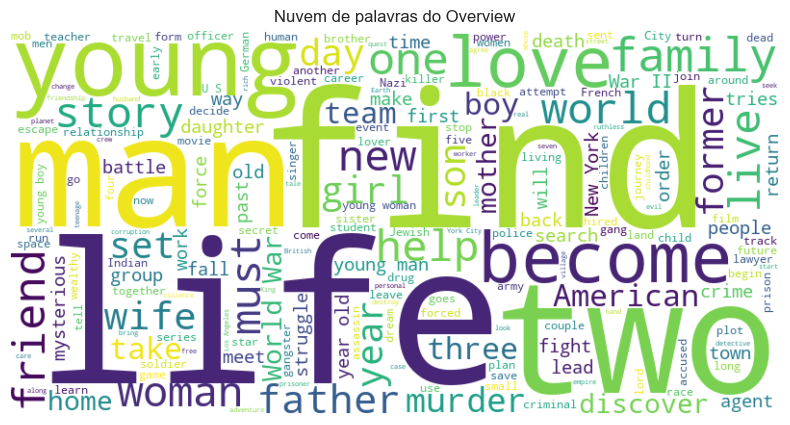

In [129]:
from wordcloud import WordCloud

texto = " ".join(df['Overview'].dropna().astype(str))
nuvem = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10,5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de palavras do Overview")
plt.show()


#### 6.2 Termos por gênero:

In [131]:

from collections import Counter
import re

df['Genero_Principal'] = df['Genre'].apply(lambda x: str(x).split(',')[0] if pd.notna(x) else np.nan)
sub = df[['Overview','Genero_Principal']].dropna()

# Pega apenas gêneros com representatividade mínima
vc = sub['Genero_Principal'].value_counts()
generos_validos = vc[vc >= 25].index
sub = sub[sub['Genero_Principal'].isin(generos_validos)]

# Função para contar palavras (filtrando curtas)
def top_palavras(textos, n=5):
    tokens = re.findall(r'\b\w+\b', " ".join(textos).lower())
    tokens_filtrados = [t for t in tokens if len(t) > 3]
    return Counter(tokens_filtrados).most_common(n)

# Mostrar top palavras para cada gênero
for genero in generos_validos:
    palavras = top_palavras(sub[sub['Genero_Principal']==genero]['Overview'])
    print(f"\nTop palavras em {genero}:")
    print(palavras)



Top palavras em Drama:
[('with', 71), ('life', 48), ('their', 47), ('young', 40), ('woman', 35)]

Top palavras em Action:
[('from', 45), ('with', 39), ('after', 26), ('when', 19), ('must', 19)]

Top palavras em Comedy:
[('with', 44), ('their', 37), ('young', 24), ('that', 23), ('when', 19)]

Top palavras em Crime:
[('with', 26), ('murder', 16), ('young', 16), ('when', 14), ('after', 13)]

Top palavras em Biography:
[('story', 22), ('with', 20), ('life', 19), ('from', 15), ('american', 12)]

Top palavras em Animation:
[('young', 23), ('when', 19), ('with', 19), ('girl', 14), ('their', 14)]

Top palavras em Adventure:
[('their', 14), ('with', 12), ('after', 11), ('from', 11), ('world', 10)]


#### 6.3 Classificação automática de gêneros (TF-IDF + baseline)

In [133]:
# Mantém apenas gêneros principais
df['Genero_Principal'] = df['Genre'].apply(lambda x: str(x).split(',')[0] if pd.notna(x) else np.nan)
sub = df[['Overview','Genero_Principal']].dropna()

# Filtrar gêneros com representatividade mínima
vc = sub['Genero_Principal'].value_counts()
generos_validos = vc[vc >= 25].index
sub = sub[sub['Genero_Principal'].isin(generos_validos)]

# Vetorização TF-IDF
vet = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=5)
X = vet.fit_transform(sub['Overview'].astype(str))
y = sub['Genero_Principal']

# Divisão treino/teste
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modelo com balanceamento de classes
modelo = LogisticRegression(max_iter=200, class_weight='balanced')
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)

# Relatório sem warnings de métricas indefinidas
print(classification_report(yte, ypred, zero_division=0))

              precision    recall  f1-score   support

      Action       0.47      0.40      0.43        35
   Adventure       0.23      0.43      0.30        14
   Animation       0.18      0.25      0.21        16
   Biography       0.25      0.28      0.26        18
      Comedy       0.25      0.26      0.25        31
       Crime       0.29      0.24      0.26        21
       Drama       0.43      0.34      0.38        58

    accuracy                           0.32       193
   macro avg       0.30      0.31      0.30       193
weighted avg       0.34      0.32      0.33       193



## 7.0 Análise por Gênero Cinematográfico:

#### 7.1 Gênero:

In [136]:
generos = df.dropna(subset=["Genre"]).copy()
generos["Genero_lista"] = generos["Genre"].str.split(", ")
generos_explod = generos.explode("Genero_lista")

display(generos.head(3))

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_min,Decada,Classificacao,Genero_Principal,Genero_lista
0,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,175.0,1970.0,A,Crime,"[Crime, Drama]"
1,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,152.0,2000.0,UA,Action,"[Action, Crime, Drama]"
2,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,202.0,1970.0,A,Crime,"[Crime, Drama]"


#### 7.2 Frequência por gênero:

Genero_lista
Drama        721
Comedy       233
Crime        208
Adventure    195
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       98
Animation     82
Sci-Fi        67
Fantasy       66
Family        56
History       55
War           51
Name: count, dtype: int64

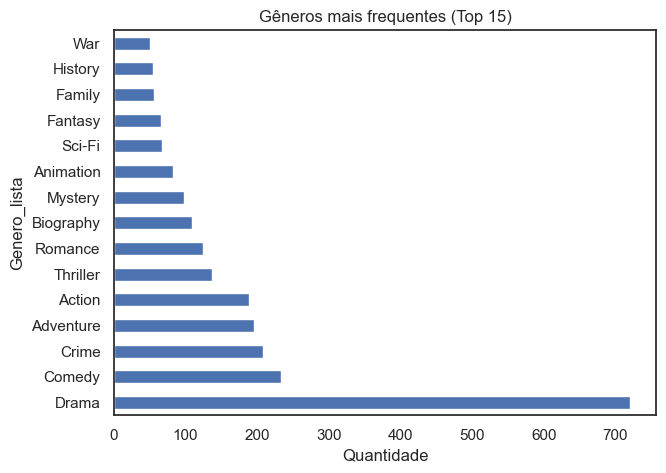

In [138]:
contagem = generos_explod["Genero_lista"].value_counts().head(15)
display(contagem)

contagem.plot(kind="barh", figsize=(7,5))
plt.title("Gêneros mais frequentes (Top 15)")
plt.xlabel("Quantidade")
plt.show()

#### 7.3 notas médias por gênero:

Genero_lista
War          8.01
Western      8.00
Film-Noir    7.99
Sci-Fi       7.98
Mystery      7.97
History      7.96
Drama        7.96
Adventure    7.95
Crime        7.95
Action       7.95
Musical      7.95
Biography    7.94
Fantasy      7.93
Animation    7.93
Sport        7.93
Name: IMDB_Rating, dtype: float64

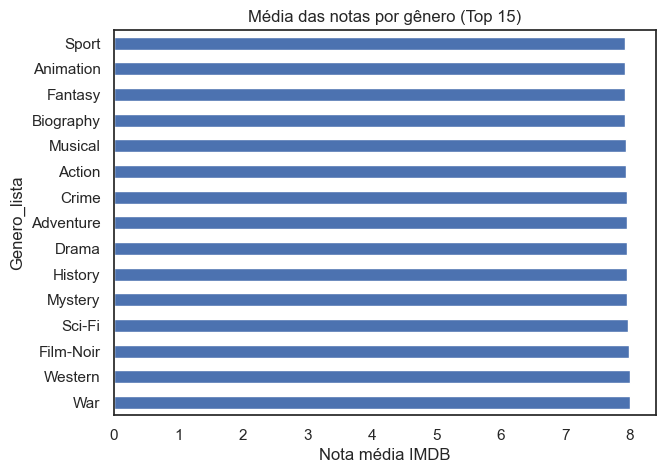

In [142]:
nota_genero = generos_explod.groupby("Genero_lista")["IMDB_Rating"].mean().sort_values(ascending=False).head(15)
display(nota_genero.round(2))

nota_genero.plot(kind="barh", figsize=(7,5))
plt.title("Média das notas por gênero (Top 15)")
plt.xlabel("Nota média IMDB")
plt.show()

#### 7.4 Bilheteria mediana por gênero:

Genero_lista
Adventure    120540719.0
Animation     75082668.0
Sci-Fi        70511035.0
Action        65707655.0
Family        46061332.5
Fantasy       45953122.5
History       41542115.0
Biography     39808740.5
Thriller      25782912.0
Sport         23383987.0
Comedy        18600000.0
Crime         18500021.0
Drama         16137014.0
Western       13517500.0
Mystery       13275000.0
Name: Gross, dtype: float64

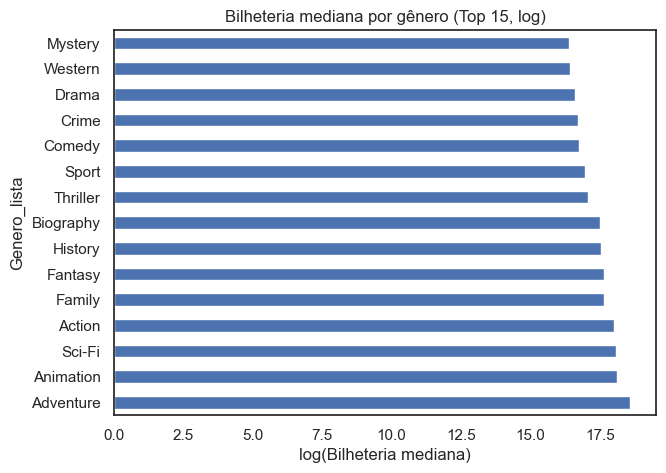

In [146]:
faturamento_genero = generos_explod.groupby("Genero_lista")["Gross"].median().dropna().sort_values(ascending=False).head(15)
display(faturamento_genero)

np.log1p(faturamento_genero).plot(kind="barh", figsize=(7,5))
plt.title("Bilheteria mediana por gênero (Top 15, log)")
plt.xlabel("log(Bilheteria mediana)")
plt.show()

#### 7.5 Violin plot da distribuição de bilheteira por gênero

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=generos_explod, 
               x="Genero_lista", 
               y=np.log1p(generos_explod["Gross"]), 
               inner="box", cut=0)
plt.xticks(rotation=90)
plt.title("Distribuição da bilheteria (log) por gênero")
plt.ylabel("log(Gross)")
plt.xlabel("Gênero")
plt.show()


## 8.0 Análise da variável Certificate

#### 8.1 Frequência de cada classificação

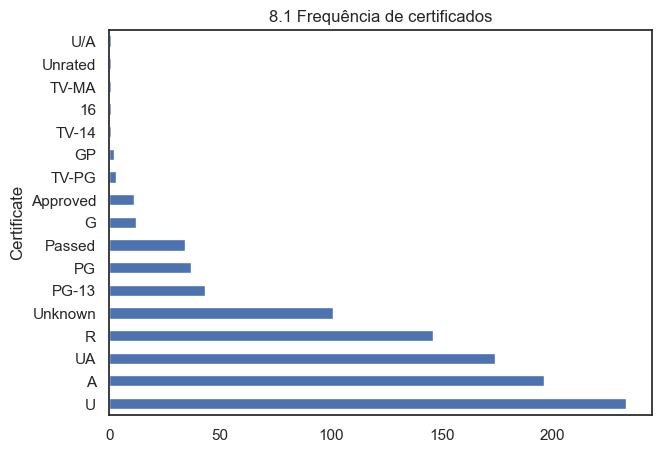

In [225]:
df['Certificate'] = df['Certificate'].fillna('Unknown').str.strip()
df['Certificate'].value_counts().plot(kind="barh", figsize=(7,5))
plt.title("8.1 Frequência de certificados")
plt.show()


#### 8.2 Notas médias e medianas por certificado

In [172]:
df.groupby('Certificate')['IMDB_Rating'].agg(['count','mean','median']).round(2)

,count,mean,median
Certificate,,,
16,1,8.10,8.10
A,196,7.99,8.00
Approved,11,7.95,8.00
G,12,8.00,8.00
GP,2,7.85,7.85
PG,37,7.93,7.90
PG-13,43,7.80,7.70
Passed,34,8.02,8.05
R,146,7.87,7.80


#### 8.3 Bilheteria mediana por certificado

In [231]:
df.groupby('Certificate')['Gross'].median()


Certificate
16                 NaN
A           45598982.0
Approved     4360000.0
G           33190753.5
GP            708958.0
PG           7533695.5
PG-13       13122642.0
Passed       4360000.0
R            6391436.0
TV-14              NaN
TV-MA              NaN
TV-PG         106662.0
U           39868642.0
U/A         26020957.0
UA          62594965.5
Unknown       189179.0
Unrated       300000.0
Name: Gross, dtype: float64

#### 8.4 Teste estatístico entre certificados

In [234]:
grupos = [g['IMDB_Rating'].dropna().values for _, g in df.groupby('Certificate') if len(g) >= 15]
if len(grupos) >= 2:
    H, p = stats.kruskal(*grupos)
    print(f"8.4 Kruskal–Wallis: H={H:.3f}, p={p:.4e}")


8.4 Kruskal–Wallis: H=37.393, p=3.9521e-06


## 9.0 Tendências temporais:

#### 9.1 filmes lançados por década:

Decada
1920.0     11
1930.0     24
1940.0     35
1950.0     56
1960.0     73
1970.0     76
1980.0     89
1990.0    149
2000.0    237
2010.0    241
2020.0      6
dtype: int64

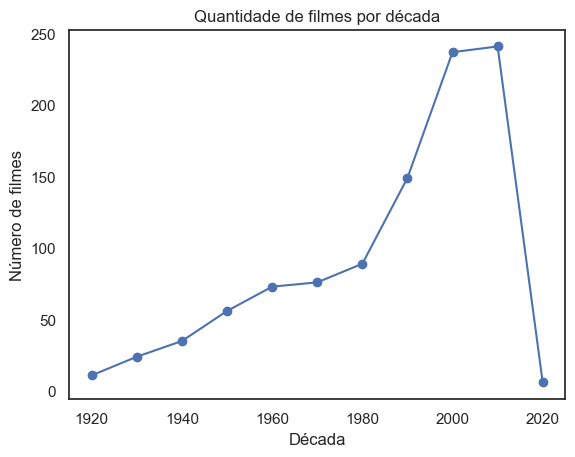

In [238]:
qtd_decada = df.groupby("Decada").size()
display(qtd_decada)

plt.plot(qtd_decada.index.astype(int), qtd_decada.values, marker="o")
plt.title("Quantidade de filmes por década")
plt.xlabel("Década")
plt.ylabel("Número de filmes")
plt.show()

#### 9.2 Evolução da nota média ao longo das décadas por gênero(?)

Decada
1920.0    8.13
1930.0    7.97
1940.0    8.03
1950.0    8.06
1960.0    7.97
1970.0    7.97
1980.0    7.95
1990.0    7.95
2000.0    7.90
2010.0    7.92
2020.0    8.13
Name: IMDB_Rating, dtype: float64

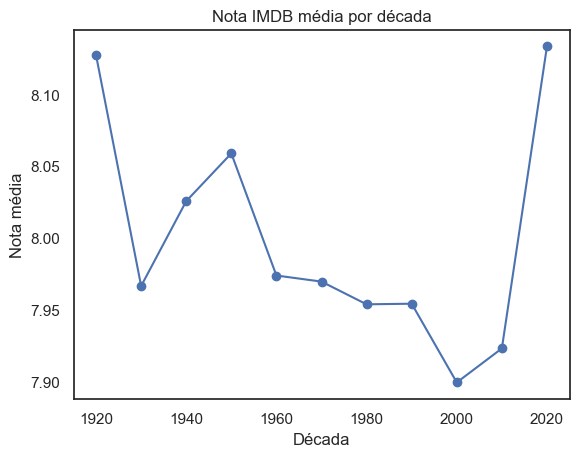

In [241]:
nota_decada = df.groupby("Decada")["IMDB_Rating"].mean()
display(nota_decada.round(2))

plt.plot(nota_decada.index.astype(int), nota_decada.values, marker="o")
plt.title("Nota IMDB média por década")
plt.xlabel("Década")
plt.ylabel("Nota média")
plt.show()


#### 9.3 Bilheteria mediana por década:

Decada
1920.0     1005635.0
1930.0     3270000.0
1940.0     3505000.0
1950.0     8000000.0
1960.0    16217773.0
1970.0    31800000.0
1980.0    39242020.5
1990.0    25010410.0
2000.0    23637265.0
2010.0    35477546.0
Name: Gross, dtype: float64

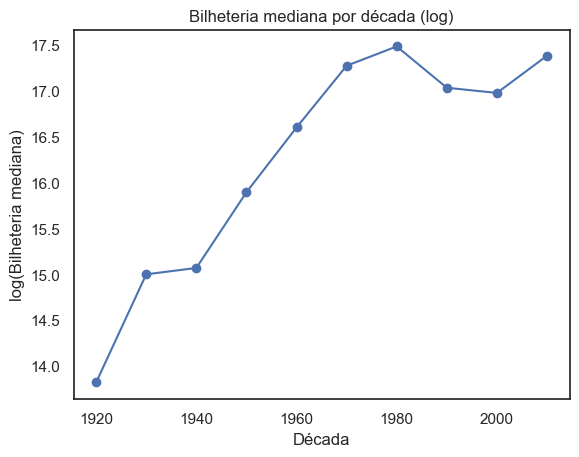

In [244]:
gross_decada = df.groupby("Decada")["Gross"].median().dropna()
display(gross_decada)

plt.plot(gross_decada.index.astype(int), np.log1p(gross_decada.values), marker="o")
plt.title("Bilheteria mediana por década (log)")
plt.xlabel("Década")
plt.ylabel("log(Bilheteria mediana)")
plt.show()

## 10.0 Diretores e elenco:

#### 10.1 top 15 diretores com mais filmes

Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Clint Eastwood        8
Quentin Tarantino     8
David Fincher         8
Howard Hawks          7
Ingmar Bergman        7
Rob Reiner            7
Name: count, dtype: int64

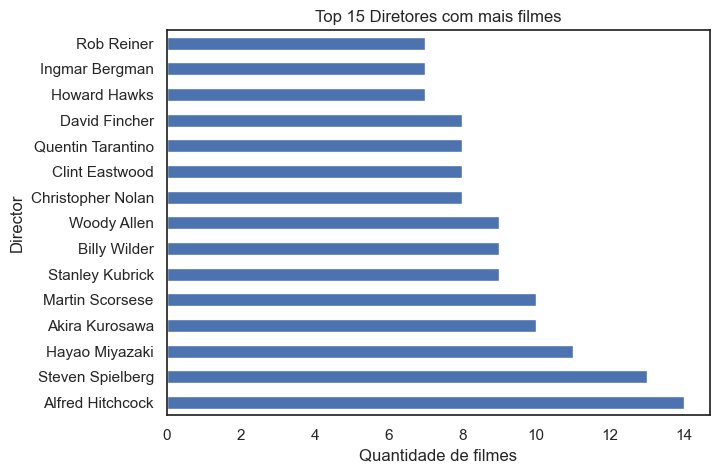

In [248]:
dir_qtd = df["Director"].value_counts().head(15)
display(dir_qtd)

dir_qtd.plot(kind="barh", figsize=(7,5))
plt.title("Top 15 Diretores com mais filmes")
plt.xlabel("Quantidade de filmes")
plt.show()

#### 10.2 top 15 diretores com maior faturamento:

Director
Steven Spielberg     2.478133e+09
Anthony Russo        2.205039e+09
Christopher Nolan    1.937454e+09
James Cameron        1.748237e+09
Peter Jackson        1.597312e+09
J.J. Abrams          1.423171e+09
Brad Bird            1.099628e+09
Robert Zemeckis      1.049446e+09
David Yates          9.789537e+08
Pete Docter          9.393821e+08
Ridley Scott         7.667114e+08
Quentin Tarantino    7.270343e+08
James Gunn           7.229897e+08
David Fincher        7.133145e+08
Sam Mendes           6.981393e+08
Name: Gross, dtype: float64

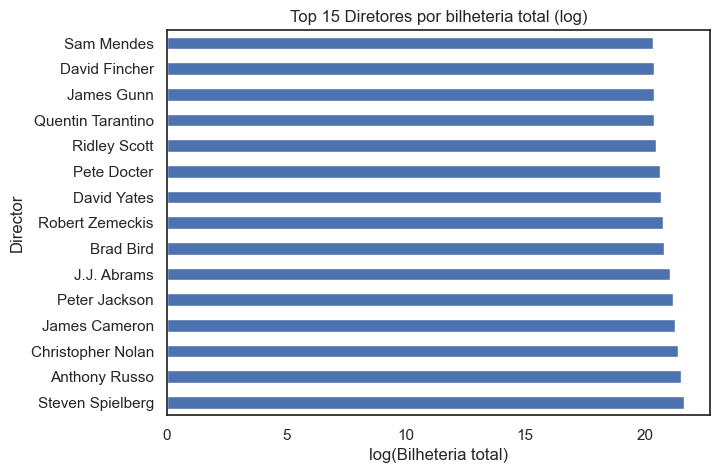

In [251]:
dir_gross = df.groupby("Director")["Gross"].sum().sort_values(ascending=False).head(15)
display(dir_gross)

np.log1p(dir_gross).plot(kind="barh", figsize=(7,5))
plt.title("Top 15 Diretores por bilheteria total (log)")
plt.xlabel("log(Bilheteria total)")
plt.show()

#### 10.3 Diretores com melhor nota média(mínimo de 3 filmes)

In [254]:
dir_stats = df.groupby("Director").agg(qtd=("Series_Title","count"), media=("IMDB_Rating","mean"))
dir_bons = dir_stats[dir_stats["qtd"]>=3].sort_values("media", ascending=False).head(15)
display(dir_bons.round(2))

,qtd,media
Director,,
Christopher Nolan,8,8.46
Francis Ford Coppola,5,8.40
Peter Jackson,5,8.40
Charles Chaplin,6,8.33
Sergio Leone,6,8.27
Stanley Kubrick,9,8.23
Akira Kurosawa,10,8.22
Frank Capra,4,8.20
Rajkumar Hirani,4,8.18


## 11.0 Formulação e teste de hipóteses:

#### 11.1 H1 — Meta_score influencia IMDB_Rating

In [258]:
 #Seleciona apenas as linhas onde ambos Meta_score e IMDB_Rating não são NaN
df_clean = df[['Meta_score', 'IMDB_Rating']].dropna()

# Calcula a correlação de Spearman
corr1, p1 = spearmanr(df_clean['Meta_score'], df_clean['IMDB_Rating'])

print(f"11.1 Spearman Meta_score vs IMDB_Rating: {corr1:.3f}, p={p1:.4f}")

11.1 Spearman Meta_score vs IMDB_Rating: 0.285, p=0.0000


#### 11.2 H2 — Certificados apresentam notas distintas

In [261]:
grupos = [g['IMDB_Rating'].dropna().values for _, g in df.groupby('Certificate') if len(g) >= 15]
H, p = stats.kruskal(*grupos)
display(f"11.2 Kruskal-Wallis (Notas por certificado): H={H:.3f}, p={p:.4e}")


'11.2 Kruskal-Wallis (Notas por certificado): H=37.393, p=3.9521e-06'

## 12. Conclusões sobre o projeto:

Qual filme você recomendaria para uma pessoa que você não conhece?"

"Quais são os principais fatores relacionados com alta expectativa de faturamento?"

"Quais insights podem ser tirados da coluna Overview?" (além da análise de palavras)